In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
# Finding minimum and maximum value in Numerical column
for col in ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']:
    min_val,max_val = df[col].min(),df[col].max()
    print(f"Minimum value in the {col} is {min_val} and maximum value is {max_val}")

Minimum value in the Year is 2003 and maximum value is 2018
Minimum value in the Selling_Price is 0.1 and maximum value is 35.0
Minimum value in the Present_Price is 0.32 and maximum value is 92.6
Minimum value in the Kms_Driven is 500 and maximum value is 500000


In [7]:
# Finding unique values for categorical columns
df['Seller_Type'].unique(),df['Fuel_Type'].unique(),df['Transmission'].unique(),df['Owner'].unique()

(array(['Dealer', 'Individual'], dtype=object),
 array(['Petrol', 'Diesel', 'CNG'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object),
 array([0, 1, 3], dtype=int64))

In [8]:
# Finding null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# to get details of Dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
# removing car name feature as it wont be much of help in finding selling price 
final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
               'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
final_df.shape

(301, 8)

In [13]:
final_df['Current_year'] = 2020 # will use this feature to derive how old the car is
# if you using updated data, please find the max value from year column and use it as baseline value

In [14]:
final_df['no_year'] = final_df['Current_year'] - final_df['Year']

In [15]:
final_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [16]:
final_df.drop(['Year','Current_year'],axis=1,inplace = True)

In [17]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [18]:
final_df = pd.get_dummies(final_df,drop_first=True)
'''
array(['Dealer', 'Individual'], dtype=object),
 array(['Petrol', 'Diesel', 'CNG'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object),
 array([0, 1, 3]
'''

"\narray(['Dealer', 'Individual'], dtype=object),\n array(['Petrol', 'Diesel', 'CNG'], dtype=object),\n array(['Manual', 'Automatic'], dtype=object),\n array([0, 1, 3]\n"

In [19]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


## visulazation

<AxesSubplot:>

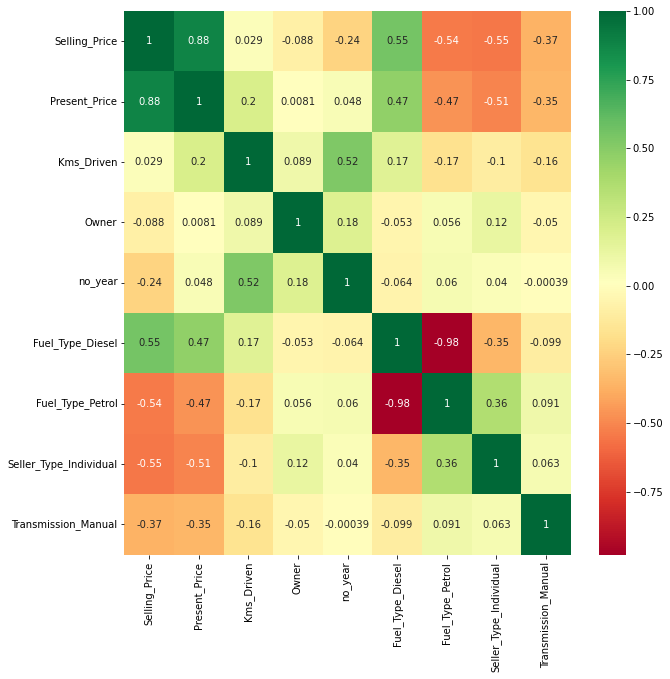

In [20]:
corr_map = final_df.corr()
top_corr_feature = corr_map.index
plt.figure(figsize=(10,10))
# plotting heatmap
sns.heatmap(final_df[top_corr_feature].corr(),annot= True , cmap = 'RdYlGn')
# annot -> to see annotaions

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

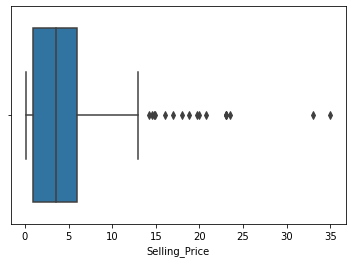

In [21]:
#Outlier detection for Dependent Variable 
sns.boxplot(final_df['Selling_Price'])

In [22]:
#Deleting Outlier
out_index=final_df[final_df['Selling_Price']>30].index
out_index


Int64Index([64, 86], dtype='int64')

In [23]:
for x in out_index:
    final_df = final_df.drop(x)

## Model Building

In [24]:
final_df
# Seeling_price -> dependent feature
# Other features -> independent features

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [25]:
# assingning x and y values for model training using iloc
x = final_df.iloc[:,1:] # 1: bcoz take all column values from 1st index(from 1st index-> dependent features)
y = final_df.iloc[:,0] # take 0th feature which is dependent feature

In [26]:
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
### Feature importancve -> to understand which feature is important 
from sklearn.ensemble import ExtraTreesRegressor  

In [29]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [30]:
print(model.feature_importances_)

[0.5112113  0.03369435 0.00075327 0.1113142  0.05191248 0.04735794
 0.1892618  0.05449465]


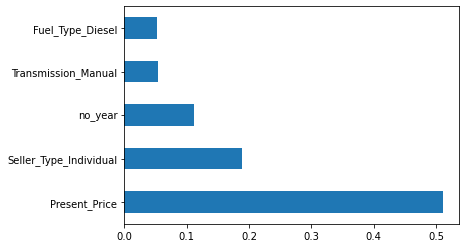

In [52]:
# PLot graph of feature importance for better visualization
feat_impor = pd.Series(model.feature_importances_, index = x.columns) 
# pd.series -> to convert it into series, x.columns to show the columns 
feat_impor.nlargest(5).plot(kind='barh') # barh-> horizontal structure
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 20)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lin_reg = LinearRegression()

In [35]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [36]:
li_pred = lin_reg.predict(x_test)

In [37]:
li_pred

array([ 8.59465296,  4.86324094,  1.27512819,  0.99734621,  1.67088496,
        9.24093091,  2.55973807,  6.39585936,  5.09609095,  2.14091028,
       -2.2239274 ,  1.90199067,  2.29181035,  5.53260734,  6.6708893 ,
        8.22373575,  5.56461428, -1.82669924,  7.73597662, -1.16218993,
        3.95769324,  9.34856552,  8.6656619 , 21.26685539, 10.40798294,
        4.46865034,  5.62175067,  5.99222786,  0.67972106, -0.25229631,
       17.21434328,  1.7886097 ,  2.24902745,  4.18827246,  3.65179646,
        4.833898  ,  6.40297569,  7.11463227,  1.61933069,  8.17795832,
        1.46354917,  0.35968481,  5.09233463,  6.13242922, -0.30749853,
        1.11304738,  6.38711226, 10.70014243,  4.14983891, 21.83147254,
        2.29093676,  9.01470015,  7.94837476,  1.12186714,  0.10096559,
        3.72461632,  7.34834737,  2.5641262 ,  6.34969621,  0.5073549 ])

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

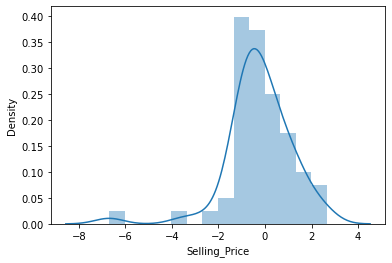

In [38]:
sns.distplot(y_test-li_pred)

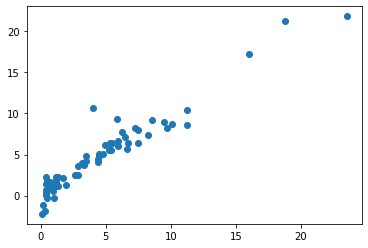

In [39]:
plt.scatter(y_test,li_pred)

In [40]:
score=lin_reg.score(x_test,y_test)
print('Accuracy score for model is: ',round(score*100,2))

Accuracy score for model is:  90.43


In [41]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(li_pred , y_test)

0.9918859274329448

In [42]:
from sklearn.metrics import mean_squared_error

mean_squared_error(li_pred , y_test)

2.016593627238016

In [43]:
x_test

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
212,13.600,22671,0,4,0,1,0,1
219,9.400,36000,0,8,0,1,0,1
28,3.950,44542,0,10,0,1,0,1
119,1.900,5400,0,7,0,1,1,1
133,0.950,500,0,4,0,1,1,1
295,13.090,60076,0,5,1,0,0,1
73,5.710,43000,0,9,0,1,0,1
240,9.400,32322,0,8,1,0,0,1
61,7.700,40588,0,5,0,1,0,1
100,1.900,3000,0,4,0,1,1,1


### Visulization of model

In [44]:
x_test.insert(0,'y_test',y_test) # adding a column named y_test with y_test data at 0th location
x_test.insert(0,'y_pred',li_pred)

In [45]:
new_df = x_test.sort_values(by = 'Present_Price')

In [46]:
new_df.head()

,y_pred,y_test,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
165,2.291810,0.45,0.54,500,0,4,0,1,1,0
158,1.788610,0.48,0.54,8600,0,3,0,1,1,1
166,1.463549,0.45,0.55,1000,0,4,0,1,1,1
191,-1.162190,0.20,0.57,25000,1,8,0,1,1,1
199,-2.223927,0.12,0.58,53000,0,13,0,1,1,1


C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y_pred', ylabel='Density'>

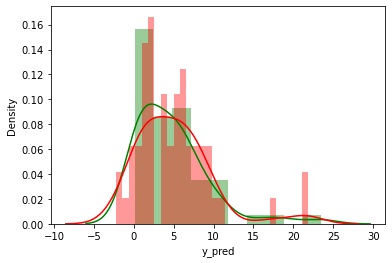

In [49]:
sns.distplot(new_df['y_test'], bins=10,color='green') # Actual value
sns.distplot(new_df['y_pred'],  bins=30,color='red') # Predicted value